In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plta
from sklearn.model_selection import train_test_split

In [2]:
data1=pd.read_csv("../input/imdb-movie/movie_metadata.csv")

In [3]:
data1.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [4]:
data1.isnull().sum()

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

In [5]:
total = data1.isnull().sum().sort_values(ascending=False)
percent_1 = (data1.isnull().sum()/data1.isnull().count())*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data1 = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data1.head(5)


,Total,%
gross,884,17.5
budget,492,9.8
aspect_ratio,329,6.5
content_rating,303,6.0
plot_keywords,153,3.0


counting null percentage

In [6]:
data1 = data1.drop(['gross'], axis=1)

i have to drop gross as its null % is 17.5%

In [7]:
data1['budget']=data1['budget'].fillna(data1['budget'].mean())
data1['num_critic_for_reviews']=data1['num_critic_for_reviews'].fillna(data1['num_critic_for_reviews'].mean())
data1['aspect_ratio']=data1['aspect_ratio'].fillna(data1['aspect_ratio'].mean())
data1['duration']=data1['duration'].fillna(data1['duration'].mean())
data1['title_year']=data1['title_year'].fillna(data1['title_year'].mean())
data1['director_facebook_likes']=data1['director_facebook_likes'].fillna(data1['director_facebook_likes'].mean())


In [8]:
data1.isnull().sum()

color                         19
director_name                104
num_critic_for_reviews         0
duration                       0
director_facebook_likes        0
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               303
budget                         0
title_year                     0
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                   0
movie_facebook_likes           0
dtype: int64

treating null values with mean

In [9]:
from sklearn.impute import SimpleImputer
se=SimpleImputer(strategy='most_frequent')
data1=se.fit_transform(data1)
data1

array([['Color', 'James Cameron', 723.0, ..., 7.9, 1.78, 33000],
       ['Color', 'Gore Verbinski', 302.0, ..., 7.1, 2.35, 0],
       ['Color', 'Sam Mendes', 602.0, ..., 6.8, 2.35, 85000],
       ...,
       ['Color', 'Benjamin Roberds', 13.0, ..., 6.3, 2.2204030547307805,
        16],
       ['Color', 'Daniel Hsia', 14.0, ..., 6.3, 2.35, 660],
       ['Color', 'Jon Gunn', 43.0, ..., 6.6, 1.85, 456]], dtype=object)

categirial data nan replace with max frequency

In [10]:
data1=pd.DataFrame(data1)

converting numpy to data frame as it convert it to numpy when max freq replacement is done

In [11]:
data1.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
dtype: int64

In [12]:
data1 = data1.set_axis([ 'color', 'director_name','num_critic_for_reviews','duration','director_facebook_likes','actor_3_facebook_likes','actor_2_name','actor_1_facebook_likes','genres','actor_1_name','movie_title','num_voted_users','cast_total_facebook_likes','actor_3_name','facenumber_in_poster','plot_keywords','movie_imdb_link','num_user_for_reviews','language','country','content_rating','budget','title_year','actor_2_facebook_likes','imdb_score','aspect_ratio','movie_facebook_likes'], axis=1, inplace=False)
data1

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,genres,actor_1_name,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,Action|Adventure|Fantasy,Johnny Depp,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,Action|Adventure|Thriller,Christoph Waltz,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,Action|Thriller,Tom Hardy,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,Color,Doug Walker,140.194272,107.201074,131.0,1000.0,Rob Walker,131.0,Documentary,Doug Walker,...,1.0,English,USA,R,39752620.436388,2002.470517,12.0,7.1,2.220403,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Color,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,Comedy|Drama,Eric Mabius,...,6.0,English,Canada,R,39752620.436388,2013.0,470.0,7.7,2.220403,84
5039,Color,Steven Spielberg,43.0,43.0,686.509212,319.0,Valorie Curry,841.0,Crime|Drama|Mystery|Thriller,Natalie Zea,...,359.0,English,USA,TV-14,39752620.436388,2002.470517,593.0,7.5,16.0,32000
5040,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,Drama|Horror|Thriller,Eva Boehnke,...,3.0,English,USA,R,1400.0,2013.0,0.0,6.3,2.220403,16
5041,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,Comedy|Drama|Romance,Alan Ruck,...,9.0,English,USA,PG-13,39752620.436388,2012.0,719.0,6.3,2.35,660


renaming column as column name has change


In [13]:
data1.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'genres', 'actor_1_name', 'movie_title',
       'num_voted_users', 'cast_total_facebook_likes', 'actor_3_name',
       'facenumber_in_poster', 'plot_keywords', 'movie_imdb_link',
       'num_user_for_reviews', 'language', 'country', 'content_rating',
       'budget', 'title_year', 'actor_2_facebook_likes', 'imdb_score',
       'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

Text(0, 0.5, 'imdb rating')

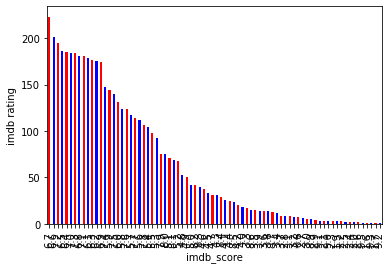

In [14]:
plt = data1.imdb_score.value_counts().plot(kind='bar',color=['r','b'])
plt.set_xlabel('imdb_score')
plt.set_ylabel('imdb rating')

plotting a bar of imdb score


Text(0, 0.5, 'movie_facebook_likes')

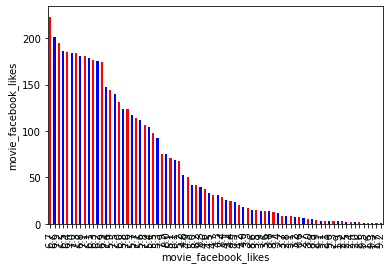

In [15]:
plt = data1.imdb_score.value_counts().plot(kind='bar',color=['r','b'])
plt.set_xlabel('movie_facebook_likes')
plt.set_ylabel('movie_facebook_likes')

Text(0, 0.5, 'budget')

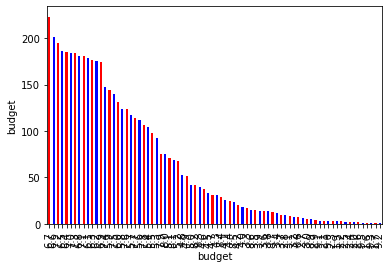

In [16]:
plt = data1.imdb_score.value_counts().plot(kind='bar',color=['r','b'])
plt.set_xlabel('budget')
plt.set_ylabel('budget')

In [17]:
data1['country'] = data1['country'].map({'USA':0, 'NewZealand':1})
data1['language'] = data1['language'].map({'English':0})

In [18]:
#split dataset in features and target variable
feature_cols = ['director_name','title_year']
X = data1[feature_cols] # Features
y = data1.imdb_score # Target variable

In [19]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=None)

In [20]:
data1 = data1.drop(['color','director_name','actor_2_name','genres','actor_1_name','movie_title','actor_3_name','plot_keywords','movie_imdb_link','language','country','content_rating',], axis=1)

droping categorical data so to find min max

In [21]:
from sklearn import preprocessing
  
min_max_scaler = preprocessing.MinMaxScaler(feature_range =(0, 1))
  
data1_after_min_max_scaler = min_max_scaler.fit_transform(data1)
  
print ("\nAfter min max Scaling : \n", data1_after_min_max_scaler)
  
Standardisation = preprocessing.StandardScaler()
  
data1_after_Standardisation = Standardisation.fit_transform(data1)
  
print ("\nAfter Standardisation : \n", data1_after_Standardisation)


After min max Scaling : 
 [[8.89162562e-01 3.39285714e-01 0.00000000e+00 ... 7.97468354e-01
  4.04858300e-02 9.45558739e-02]
 [3.70689655e-01 3.21428571e-01 2.44782609e-02 ... 6.96202532e-01
  7.89473684e-02 0.00000000e+00]
 [7.40147783e-01 2.79761905e-01 0.00000000e+00 ... 6.58227848e-01
  7.89473684e-02 2.43553009e-01]
 ...
 [1.47783251e-02 1.36904762e-01 0.00000000e+00 ... 5.94936709e-01
  7.02026353e-02 4.58452722e-05]
 [1.60098522e-02 1.84523810e-01 0.00000000e+00 ... 5.94936709e-01
  7.89473684e-02 1.89111748e-03]
 [5.17241379e-02 1.64682540e-01 6.95652174e-04 ... 6.32911392e-01
  4.52091768e-02 1.30659026e-03]]

After Standardisation : 
 [[ 4.81716418e+00  2.81423447e+00 -2.46601009e-01 ...  1.29587271e+00
  -3.28897844e-01  1.31863223e+00]
 [ 1.33740065e+00  2.45648737e+00 -4.43657504e-02 ...  5.84764324e-01
   9.67844239e-02 -3.89572329e-01]
 [ 3.81704212e+00  1.62174415e+00 -2.46601009e-01 ...  3.18098678e-01
   9.67844239e-02  4.01034850e+00]
 ...
 [-1.05132064e+00 -1.24023

In [22]:
data1.isnull().sum()

num_critic_for_reviews       0
duration                     0
director_facebook_likes      0
actor_3_facebook_likes       0
actor_1_facebook_likes       0
num_voted_users              0
cast_total_facebook_likes    0
facenumber_in_poster         0
num_user_for_reviews         0
budget                       0
title_year                   0
actor_2_facebook_likes       0
imdb_score                   0
aspect_ratio                 0
movie_facebook_likes         0
dtype: int64

Text(0, 0.5, 'imdb_score')

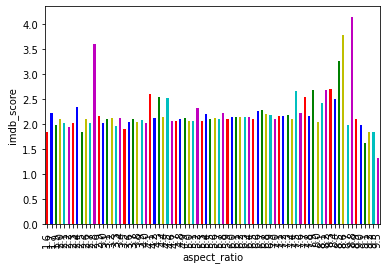

In [23]:
plt = data1[['aspect_ratio', 'imdb_score']].groupby('imdb_score').mean().aspect_ratio.plot(kind='bar',color=['r','b','g','y','c','m'])
plt.set_xlabel('aspect_ratio')
plt.set_ylabel('imdb_score')